# 01. Khám Phá Dữ Liệu (EDA)
Notebook này thực hiện phân tích khám phá dữ liệu (Exploratory Data Analysis) cho bộ dữ liệu UCI Student Performance.

In [ ]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.loader import DataLoader

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
%matplotlib inline

## 1. Tải Dữ Liệu

In [ ]:
loader = DataLoader()
df = loader.load_combined_data(merge=False) 
print(f"Kích thước dữ liệu: {df.shape}")

Loaded 395 records from student-mat.csv
Loaded 649 records from student-por.csv
Dữ liệu đã nối: 1044 bản ghi tổng cộng
Kích thước dữ liệu: (1044, 34)


## 1.5. Data Dictionary (Từ Điển Dữ Liệu)
Bộ dữ liệu chứa các thông tin sinh viên với các thuộc tính chính như sau:

**Thông tin cá nhân:**
*   **school**: Trường học của sinh viên (binary: 'GP' - Gabriel Pereira hoặc 'MS' - Mousinho da Silveira)
*   **sex**: Giới tính (binary: 'F' - Nữ hoặc 'M' - Nam)
*   **age**: Tuổi học sinh (numeric: từ 15 đến 22)
*   **address**: Loại hình cư trú (binary: 'U' - Thành thị hoặc 'R' - Nông thôn)

**Thông tin gia đình:**
*   **famsize**: Kích thước gia đình (binary: 'LE3' - nhỏ hơn hoặc bằng 3 người hoặc 'GT3' - lớn hơn 3 người)
*   **Pstatus**: Tình trạng sống chung của cha mẹ (binary: 'T' - sống cùng hoặc 'A' - sống riêng)
*   **Medu**: Trình độ học vấn của mẹ (numeric: 0 - không có, 1 - tiểu học, 2 - THCS, 3 - THPT, 4 - đại học trở lên)
*   **Fedu**: Trình độ học vấn của cha (numeric: 0 - không có, 1 - tiểu học, 2 - THCS, 3 - THPT, 4 - đại học trở lên)
*   **Mjob**: Nghề nghiệp của mẹ (nominal: 'teacher', 'health', 'services', 'at_home', 'other')
*   **Fjob**: Nghề nghiệp của cha (nominal: 'teacher', 'health', 'services', 'at_home', 'other')
*   **reason**: Lý do chọn trường (nominal: 'home' - gần nhà, 'reputation' - uy tín trường, 'course' - sở thích môn học, 'other')
*   **guardian**: Người giám hộ (nominal: 'mother', 'father', 'other')

**Yếu tố học tập:**
*   **traveltime**: Thời gian di chuyển từ nhà đến trường (numeric: 1 - <15 phút, 2 - 15-30 phút, 3 - 30 phút đến 1 giờ, 4 - >1 giờ)
*   **studytime**: Thời gian học hàng tuần (numeric: 1 - <2 giờ, 2 - 2-5 giờ, 3 - 5-10 giờ, 4 - >10 giờ)
*   **failures**: Số lần thất bại môn học trong quá khứ (numeric: 1-3, nếu >=4 thì gán là 4)
*   **schoolsup**: Hỗ trợ giáo dục thêm (binary: yes hoặc no)
*   **famsup**: Hỗ trợ giáo dục từ gia đình (binary: yes hoặc no)
*   **paid**: Học thêm ngoài giờ (binary: yes hoặc no)
*   **activities**: Hoạt động ngoại khóa (binary: yes hoặc no)

**Yếu tố xã hội:**
*   **nursery**: Đã học mẫu giáo (binary: yes hoặc no)
*   **higher**: Mong muốn học đại học (binary: yes hoặc no)
*   **internet**: Có Internet tại nhà (binary: yes hoặc no)
*   **romantic**: Có mối quan hệ tình cảm (binary: yes hoặc no)
*   **famrel**: Chất lượng quan hệ gia đình (numeric: từ 1 - rất tệ đến 5 - tuyệt vời)
*   **freetime**: Thời gian rảnh sau giờ học (numeric: từ 1 - rất ít đến 5 - rất nhiều)
*   **goout**: Đi chơi với bạn bè (numeric: từ 1 - rất ít đến 5 - rất nhiều)
*   **Dalc**: Mức tiêu thụ rượu ngày trong tuần (numeric: từ 1 - rất thấp đến 5 - rất cao)
*   **Walc**: Mức tiêu thụ rượu ngày cuối tuần (numeric: từ 1 - rất thấp đến 5 - rất cao)
*   **health**: Trạng thái sức khỏe hiện tại (numeric: từ 1 - rất tệ đến 5 - rất tốt)

**Biến mục tiêu:**
*   **absences**: Số ngày nghỉ học (numeric: từ 0 đến 93)
*   **G1**: Điểm học kỳ đầu (numeric: từ 0 đến 20)
*   **G2**: Điểm học kỳ hai (numeric: từ 0 đến 20)
*   **G3**: Điểm cuối kỳ (numeric: từ 0 đến 20, biến mục tiêu)

## 2. Phân tích Data Leakage

Trong bộ dữ liệu Student Performance, có một số nguy cơ tiềm ẩn về Data Leakage cần lưu ý:

1. **Target Leakage từ điểm G1 và G2**: Biến mục tiêu G3 (điểm cuối kỳ) có thể bị rò rỉ thông tin từ G1 (điểm học kỳ đầu) và G2 (điểm học kỳ hai), vì điểm cuối kỳ thường có mối tương quan mạnh với điểm các học kỳ trước.

2. **Temporal Leakage**: Nếu mô hình được xây dựng để dự đoán điểm cuối kỳ, thì G1 và G2 không nên được sử dụng như đặc trưng vì chúng là kết quả của quá trình học tập trong năm, và không có sẵn trước khi biết điểm G3.

3. **Label Contamination**: Một số sinh viên có mặt trong cả hai tập dữ liệu (Toán và Tiếng Bồ Đào Nha), điều này có thể gây ra hiện tượng dữ liệu đào tạo và kiểm thử bị trộn lẫn nếu không được xử lý cẩn thận.

Chúng ta sẽ cần thiết kế kỹ thuật để tránh các vấn đề này trong quá trình xây dựng mô hình.

## 3. Phân Tích Mất Cân Bằng Lớp

Chúng ta sẽ phân tích biến mục tiêu G3 để xác định mức độ mất cân bằng lớp:

Phân bố lớp Pass/Fail:
pass_fail
Pass    814
Fail    230
Name: count, dtype: int64

Tỷ lệ Fail: 22.03%
Tỷ lệ Pass: 77.97%


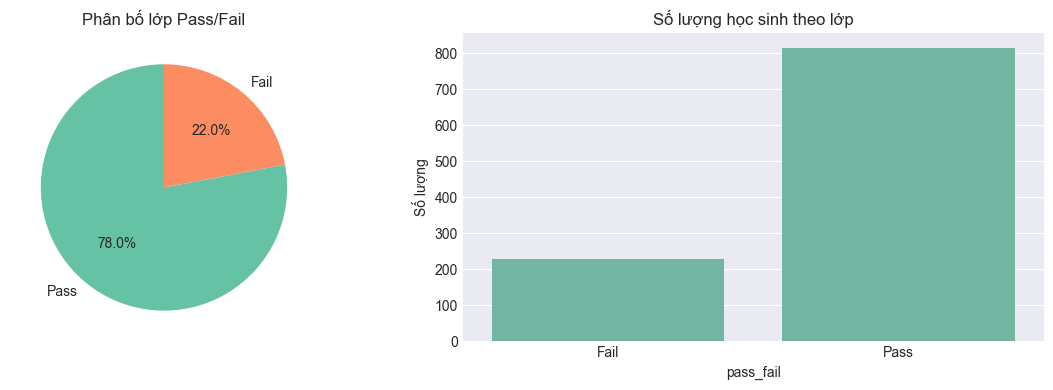

In [ ]:
# Tạo biến phân loại pass/fail dựa trên điểm G3
df['pass_fail'] = df['G3'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')

# Phân tích phân bố lớp
class_distribution = df['pass_fail'].value_counts()
print("Phân bố lớp Pass/Fail:")
print(class_distribution)
print(f"\nTỷ lệ Fail: {class_distribution['Fail']/len(df)*100:.2f}%")
print(f"Tỷ lệ Pass: {class_distribution['Pass']/len(df)*100:.2f}%")

# Trực quan hóa phân bố lớp
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.pie(class_distribution.values, labels=class_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố lớp Pass/Fail')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='pass_fail')
plt.title('Số lượng học sinh theo lớp')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

## 4. Thông Tin Cơ Bản

In [ ]:
info = loader.get_data_info(df)
for key, value in info.items():
    print(f"{key}: {value}")

n_records: 1044
n_features: 35
missing_values: 0
duplicates: 0
memory_usage: 1.1190357208251953


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 5. Phân Tích Biến Mục Tiêu (G3)

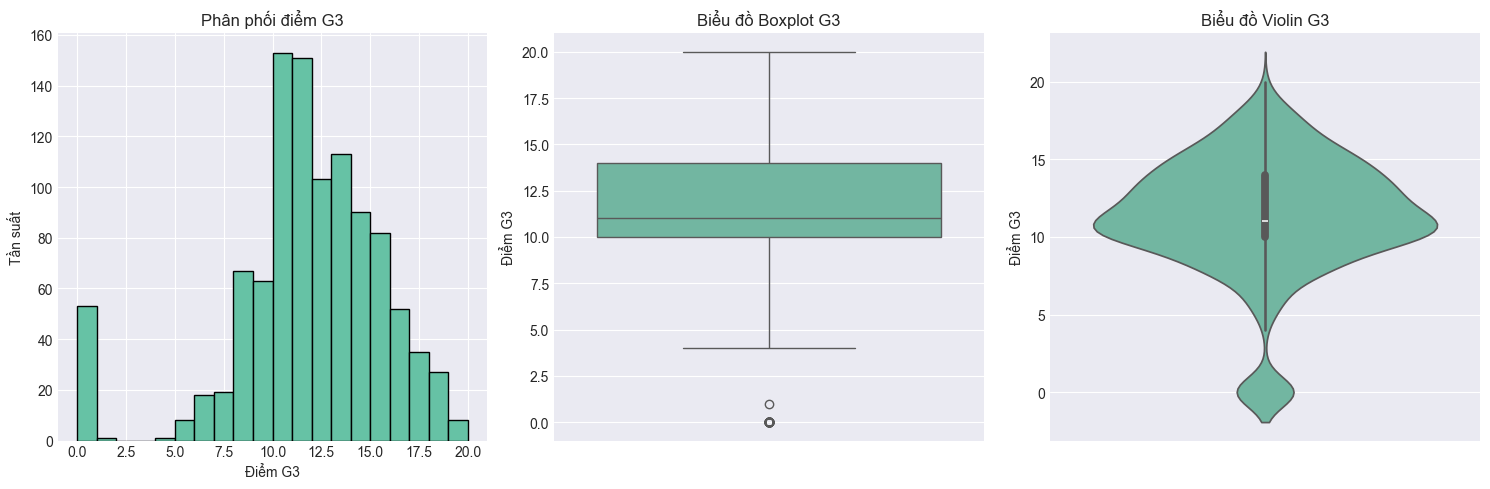

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['G3'], bins=20, edgecolor='black')
plt.title('Phân phối điểm G3')
plt.xlabel('Điểm G3')
plt.ylabel('Tần suất')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['G3'])
plt.title('Biểu đồ Boxplot G3')
plt.ylabel('Điểm G3')

plt.subplot(1, 3, 3)
sns.violinplot(y=df['G3'])
plt.title('Biểu đồ Violin G3')
plt.ylabel('Điểm G3')

plt.tight_layout()
plt.show()

## 6. Phân Tích Tương Quan

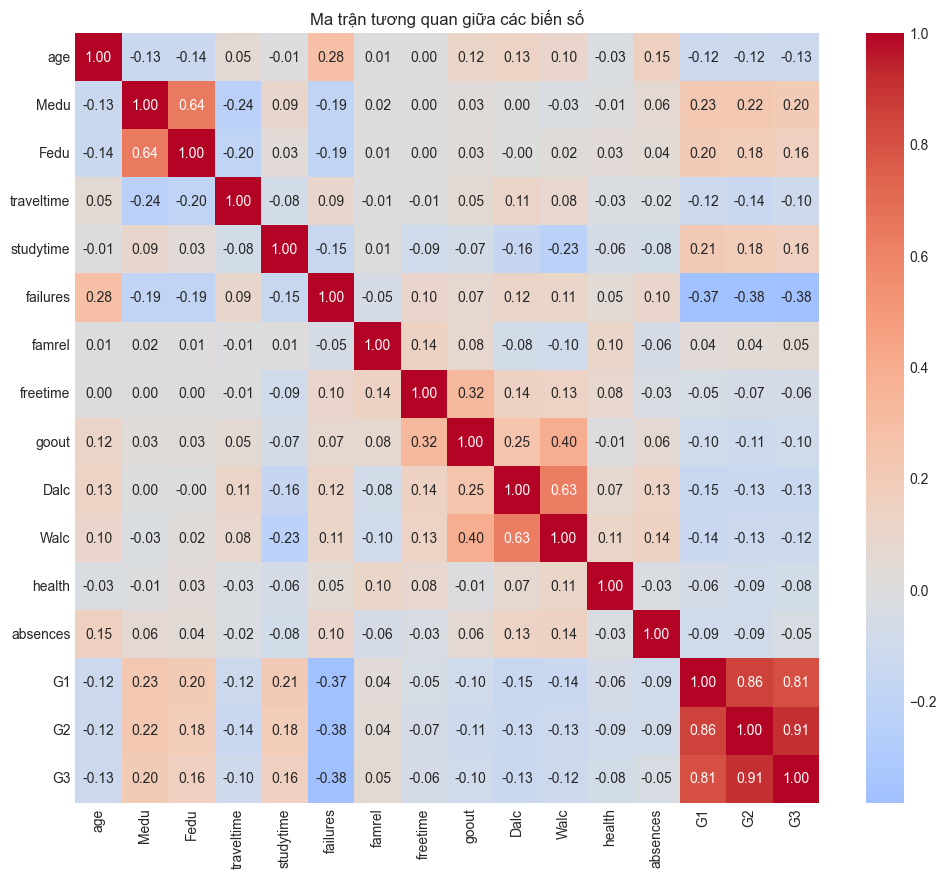

In [ ]:
# Chọn các cột số để phân tích tương quan
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
numeric_df = df[numeric_cols]

# Ma trận tương quan
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

## 7. Phân Tích Giá Trị Thiếu

In [ ]:
# Phân tích các giá trị thiếu
missing_data = df.isnull().sum()
missing_percent = 100 * missing_data / len(df)
missing_table = pd.DataFrame({'Số lượng': missing_data, 'Tỷ lệ (%)': missing_percent})
missing_table = missing_table[missing_table['Số lượng'] > 0].sort_values('Số lượng', ascending=False)

print('Các cột có giá trị thiếu:')
print(missing_table)

Các cột có giá trị thiếu:
Empty DataFrame
Columns: [Số lượng, Tỷ lệ (%)]
Index: []


In [ ]:
# Trực quan hóa các giá trị thiếu nếu có
if len(missing_table) > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percent[missing_percent > 0].index, y=missing_percent[missing_percent > 0].values)
    plt.title('Tỷ lệ giá trị thiếu theo cột')
    plt.xticks(rotation=45)
    plt.ylabel('Tỷ lệ thiếu (%)')
    plt.show()
else:
    print('Không có giá trị thiếu trong dữ liệu')

Không có giá trị thiếu trong dữ liệu


## 8. Đánh giá & Kết Luận (tự động)

Phần này được sinh tự động từ các biến/đầu ra đã tính ở trên để khi chạy lại notebook, nội dung sẽ luôn khớp với kết quả mới nhất.

In [ ]:
# Tóm tắt dữ liệu
n_rows, n_cols = df.shape
print("=== ĐÁNH GIÁ & KẾT LUẬN (EDA) ===")
print(f"1) Quy mô dữ liệu: {n_rows:,} bản ghi, {n_cols} thuộc tính")

# Phân bố mục tiêu Pass/Fail
if 'pass_fail' not in df.columns:
    df['pass_fail'] = df['G3'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')

class_dist = df['pass_fail'].value_counts()
pass_count = int(class_dist.get('Pass', class_dist.get(1, 0)))
fail_count = int(class_dist.get('Fail', class_dist.get(0, 0)))

total = max(pass_count + fail_count, 1)
pass_rate = pass_count / total
fail_rate = fail_count / total

print("\n2) Mất cân bằng lớp (Pass/Fail):")
print(f"   - Pass: {pass_count:,} ({pass_rate:.2%})")
print(f"   - Fail: {fail_count:,} ({fail_rate:.2%})")
if fail_rate < 0.3:
    print("   - Nhận xét: Lớp Fail là lớp thiểu số → ưu tiên đánh giá bằng F1/PR-AUC và phân tích FN/FP")
else:
    print("   - Nhận xét: Phân bố lớp tương đối cân bằng hơn, nhưng vẫn cần dùng metric phù hợp")

# Giá trị thiếu
missing_data = df.isnull().sum()
missing_cols = missing_data[missing_data > 0]
missing_total = int(missing_data.sum())

print("\n3) Chất lượng dữ liệu (missing values):")
print(f"   - Tổng số giá trị thiếu: {missing_total:,}")
print(f"   - Số cột có missing: {len(missing_cols)}")
if len(missing_cols) == 0:
    print("   - Nhận xét: Dữ liệu không có missing → giảm rủi ro sai lệch do imputation")
else:
    top_missing = missing_cols.sort_values(ascending=False).head(5)
    print("   - Top cột thiếu nhiều nhất:")
    for col, cnt in top_missing.items():
        print(f"     + {col}: {int(cnt):,} ({(cnt/len(df)):.2%})")

# Tương quan và rủi ro leakage
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
available_numeric = [c for c in numeric_cols if c in df.columns]

if 'G3' in available_numeric:
    corr_matrix = df[available_numeric].corr(numeric_only=True)
    g3_corr = corr_matrix['G3'].drop(labels=['G3'], errors='ignore').sort_values(key=lambda s: s.abs(), ascending=False)

    corr_g1 = float(g3_corr.get('G1', np.nan))
    corr_g2 = float(g3_corr.get('G2', np.nan))

    print("\n4) Tương quan với mục tiêu G3 (định hướng feature & cảnh báo leakage):")
    if not np.isnan(corr_g1):
        print(f"   - corr(G3, G1) ≈ {corr_g1:.3f}")
    if not np.isnan(corr_g2):
        print(f"   - corr(G3, G2) ≈ {corr_g2:.3f}")

    top_k = 6
    print(f"   - Top {top_k} biến tương quan |corr| cao với G3:")
    for feat, val in g3_corr.head(top_k).items():
        print(f"     + {feat}: {val:.3f}")

    if (not np.isnan(corr_g1) and abs(corr_g1) >= 0.7) or (not np.isnan(corr_g2) and abs(corr_g2) >= 0.7):
        print("   - Cảnh báo: G1/G2 tương quan rất cao với G3 → nếu mục tiêu là dự báo sớm cuối kỳ, dùng G1/G2 có thể gây data leakage")
    else:
        print("   - Nhận xét: Tương quan G1/G2 không quá cao hoặc không có dữ liệu → leakage ít đáng lo hơn theo tiêu chí tương quan")

print("\n5) Kết luận EDA:")
print("   - Dữ liệu đủ sạch để triển khai pipeline tiền xử lý → khai phá tri thức → mô hình hóa")
print("   - Các phân tích ở trên cung cấp cơ sở để (i) chọn metric phù hợp do mất cân bằng lớp, (ii) thiết kế thí nghiệm tránh leakage")